In [89]:
from binsmooth import BinSmooth
import numpy as np

bin_edges = np.array([0, 10000, 15000, 25000, 35000, 50000, 75000, 100000, 150000, 200000, 660000])
counts = np.array([0, 51, 39, 55, 49, 70, 116, 108, 173, 120, 202, 17])
mean_estimate = 146162

bs = BinSmooth()
bs.fit(bin_edges, counts, m=mean_estimate)

/Users/jerryli/miniconda3/envs/vis/lib/python3.12/site-packages/scipy/optimize/_optimize.py:807: RuntimeWarning: overflow encountered in multiply
  sim = np.where(msk, 2*upper_bound - sim, sim)


In [100]:
xs = np.linspace(0, 1000000, 1001)
ys = bs.cdf(xs)
dx = xs[1] - xs[0]
ys2 = np.diff(ys, prepend=[0]) / dx
ys2

array([0.00000000e+00, 3.53271429e-06, 3.97471429e-06, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [101]:
ys

array([0.        , 0.00353271, 0.00750743, ..., 1.        , 1.        ,
       1.        ])

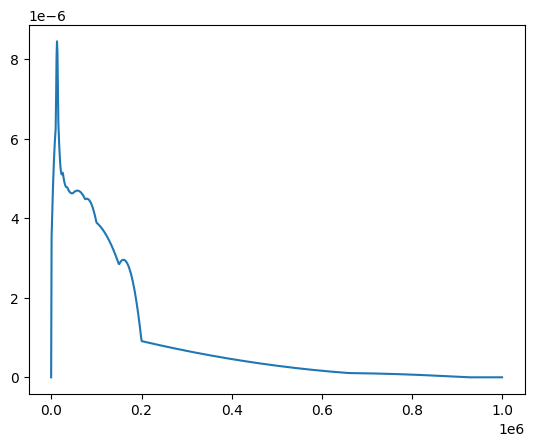

In [102]:
import matplotlib.pyplot as plt
# from scipy.interpolate import make_interp_spline, BSpline

# spl = make_interp_spline(T, power, k=3)
# smooth_ys2 = spl(ys2)
plt.plot(xs - dx/2, ys2)

/var/folders/0r/gs0ch5nn3fzcwqj_9c2f99v40000gn/T/ipykernel_33231/1803096244.py:1: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


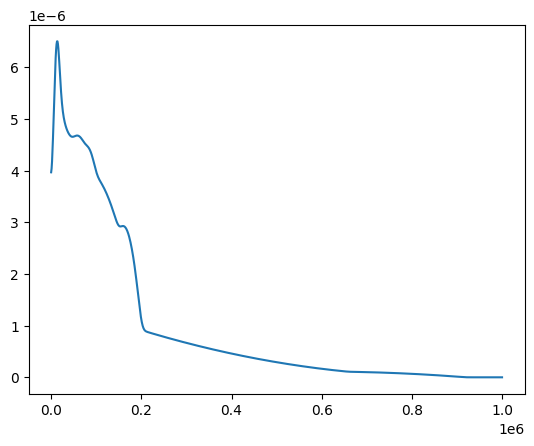

In [109]:
from scipy.ndimage.filters import gaussian_filter1d

ys3 = gaussian_filter1d(ys2, sigma=5)
plt.plot(xs, ys3)

In [111]:
import pandas as pd

df = pd.DataFrame({'income': xs, 'pdf': ys3, 'cdf': ys})
df.to_csv('income_dist.csv')
# pd.to_csv

In [76]:
ys

array([0.        , 0.02173214, 0.051     , 0.09      , 0.11924353,
       0.145     , 0.16999302, 0.194     , 0.21761719, 0.24082903,
       0.264     , 0.28737867, 0.31084958, 0.33423115, 0.35734181,
       0.38      , 0.40243752, 0.42478683, 0.44671739, 0.46789863,
       0.488     , 0.50732415, 0.52635498, 0.54503382, 0.56330197,
       0.58110074, 0.59837146, 0.61505543, 0.63109397, 0.64642839,
       0.661     , 0.67544304, 0.69021331, 0.70498452, 0.71943037,
       0.73322456, 0.74604078, 0.75755273, 0.76743412, 0.77535865,
       0.781     , 0.78536679, 0.78968524, 0.79395547, 0.79817762,
       0.80235183, 0.80647821, 0.8105569 , 0.81458804, 0.81857174,
       0.82250814, 0.82639738, 0.83023957, 0.83403486, 0.83778337,
       0.84148523, 0.84514058, 0.84874954, 0.85231224, 0.85582881,
       0.85929939, 0.8627241 , 0.86610308, 0.86943645, 0.87272434,
       0.8759669 , 0.87916423, 0.88231649, 0.88542379, 0.88848626,
       0.89150404, 0.89447726, 0.89740605, 0.90029054, 0.90313